In [10]:
# Notebook 03 - ANÁLISE E VISUALIZAÇÃO
# Pipeline de Big Data - Análise de Churn Telecom
# Equipe: [NOMES DOS MEMBROS]

# ============================================================
# ETAPA 1: CARREGAR DADOS DA CAMADA GOLD
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

print("🔧 Verificando estrutura de pastas...")

pastas = [
    '/content/dados/bronze',
    '/content/dados/silver',
    '/content/dados/gold'
]

for pasta in pastas:
    os.makedirs(pasta, exist_ok=True)

print("✅ Estrutura de pastas verificada!")
print("   - /dados/bronze")
print("   - /dados/silver")
print("   - /dados/gold\n")

# Configurar estilo dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("📊 ANÁLISE E VISUALIZAÇÃO DE DADOS")
print("="*60)

# Carregar dados transformados
df = pd.read_csv('/content/dados/silver/telco_churn_transformed.csv')
print(f"\n✅ Dados carregados: {len(df):,} registros")
print(f"📊 Features disponíveis: {df.shape[1]}")


🔧 Verificando estrutura de pastas...
✅ Estrutura de pastas verificada!
   - /dados/bronze
   - /dados/silver
   - /dados/gold

📊 ANÁLISE E VISUALIZAÇÃO DE DADOS

✅ Dados carregados: 7,043 registros
📊 Features disponíveis: 33


In [11]:
# ============================================================
# ETAPA 2: ANÁLISE EXPLORATÓRIA
# ============================================================

print("\n" + "="*60)
print("🔍 ANÁLISE EXPLORATÓRIA")
print("="*60)

# 2.1 Distribuição de Churn
print("\n📈 Distribuição de Churn:")
churn_dist = df['Churn'].value_counts()
print(churn_dist)
print(f"\nTaxa de Churn: {(df['Churn_Binary'].mean()*100):.2f}%")
print(f"Clientes ativos: {(df['Churn_Binary']==0).sum():,}")
print(f"Clientes que cancelaram: {(df['Churn_Binary']==1).sum():,}")

# 2.2 Análise por tipo de contrato
print("\n📊 Churn por tipo de contrato:")
contract_churn = df.groupby('Contract')['Churn_Binary'].agg(['count', 'sum', 'mean'])
contract_churn.columns = ['Total', 'Churns', 'Taxa_Churn']
contract_churn['Taxa_Churn'] = (contract_churn['Taxa_Churn'] * 100).round(2)
print(contract_churn)

# 2.3 Análise por tempo de permanência
print("\n📊 Churn por grupo de tenure:")
tenure_churn = df.groupby('TenureGroup')['Churn_Binary'].agg(['count', 'sum', 'mean'])
tenure_churn.columns = ['Total', 'Churns', 'Taxa_Churn']
tenure_churn['Taxa_Churn'] = (tenure_churn['Taxa_Churn'] * 100).round(2)
print(tenure_churn)

# 2.4 Impacto dos serviços
print("\n📊 Churn por número de serviços:")
servicos_churn = df.groupby('NumServicos')['Churn_Binary'].agg(['count', 'mean'])
servicos_churn.columns = ['Total', 'Taxa_Churn']
servicos_churn['Taxa_Churn'] = (servicos_churn['Taxa_Churn'] * 100).round(2)
print(servicos_churn)


🔍 ANÁLISE EXPLORATÓRIA

📈 Distribuição de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Taxa de Churn: 26.54%
Clientes ativos: 5,174
Clientes que cancelaram: 1,869

📊 Churn por tipo de contrato:
                Total  Churns  Taxa_Churn
Contract                                 
Month-to-month   3875    1655       42.71
One year         1473     166       11.27
Two year         1695      48        2.83

📊 Churn por grupo de tenure:
             Total  Churns  Taxa_Churn
TenureGroup                           
Longo         3001     358       11.93
Medio         1856     474       25.54
Novo          2186    1037       47.44

📊 Churn por número de serviços:
             Total  Taxa_Churn
NumServicos                   
1             1264       10.92
2              859       30.97
3              846       44.92
4              965       36.48
5              922       31.34
6              908       25.55
7              676       22.49
8              395       12.41
9       


📈 GERANDO VISUALIZAÇÕES
✅ Visualização salva: viz_01_distribuicao_churn.png


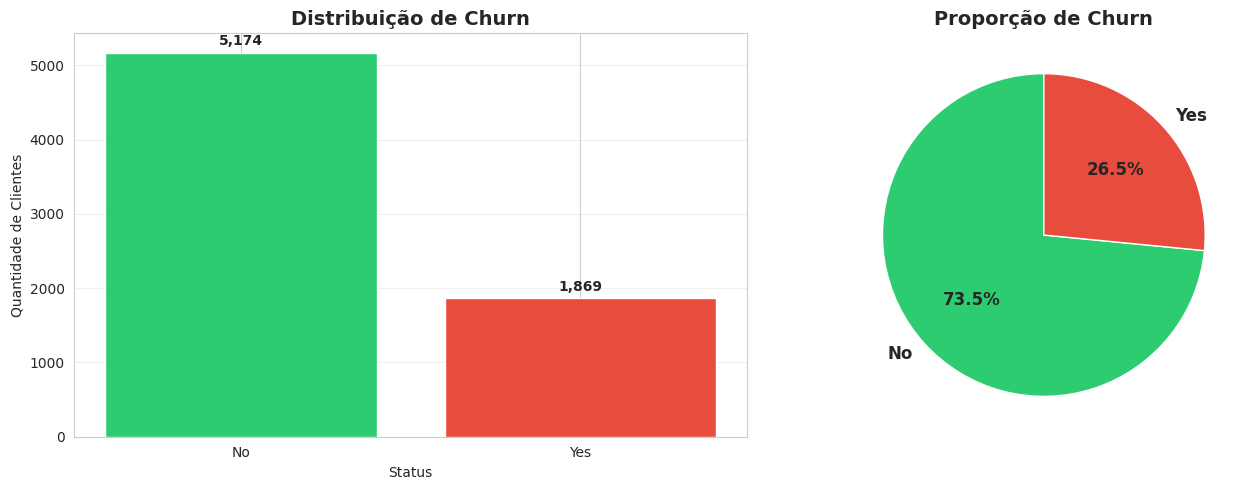

✅ Visualização salva: viz_02_churn_por_contrato.png


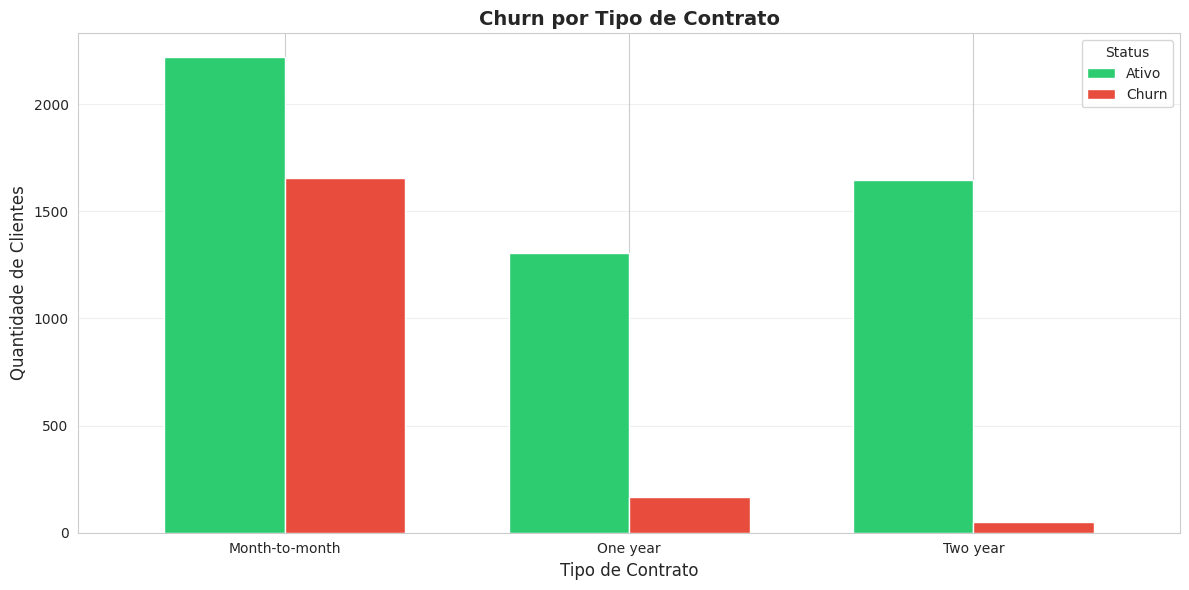

✅ Visualização salva: viz_03_analise_tenure.png


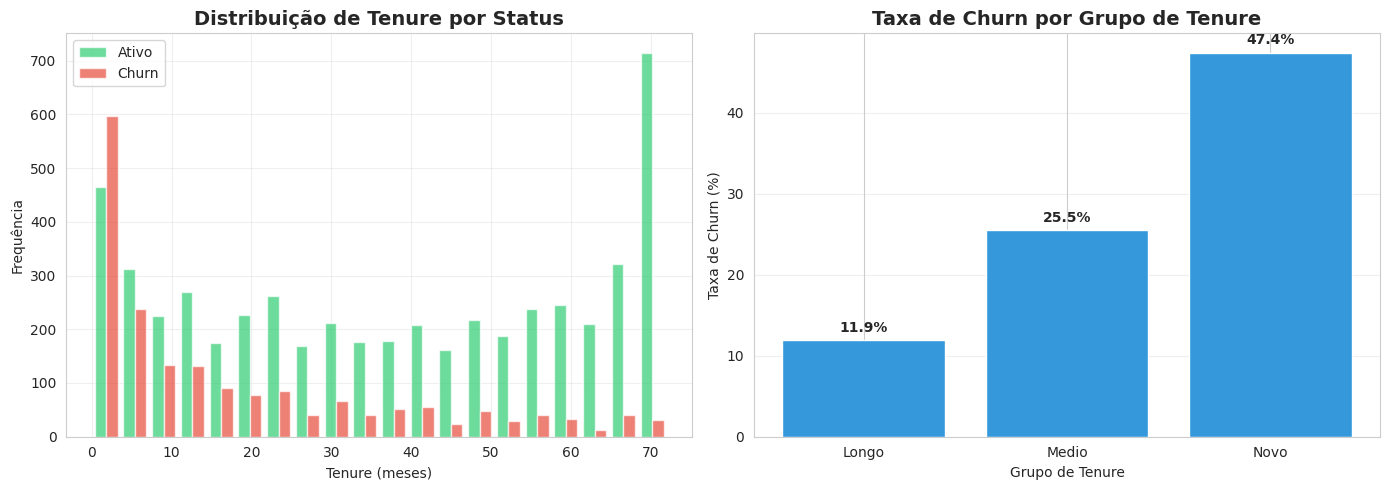

✅ Visualização salva: viz_04_charges_vs_churn.png


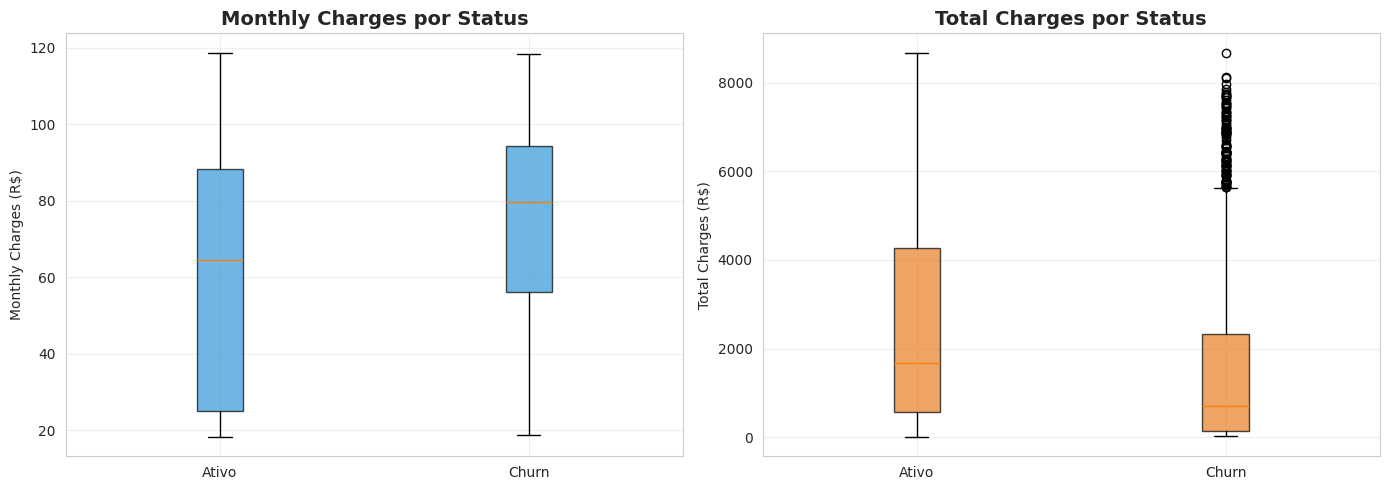

✅ Visualização salva: viz_05_impacto_servicos.png


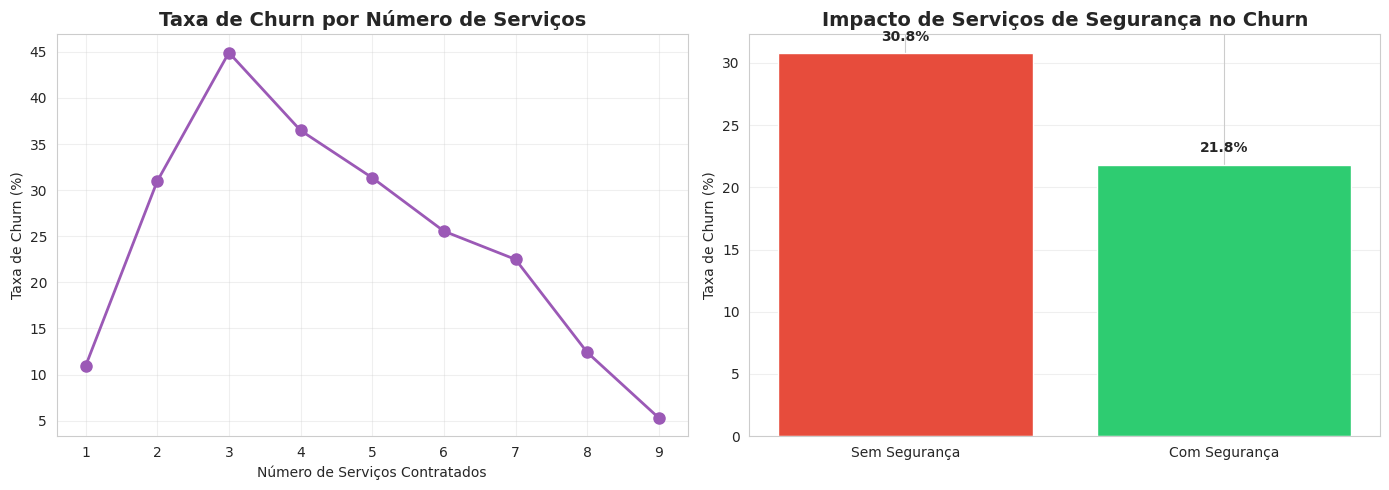

✅ Visualização salva: viz_06_correlacao.png


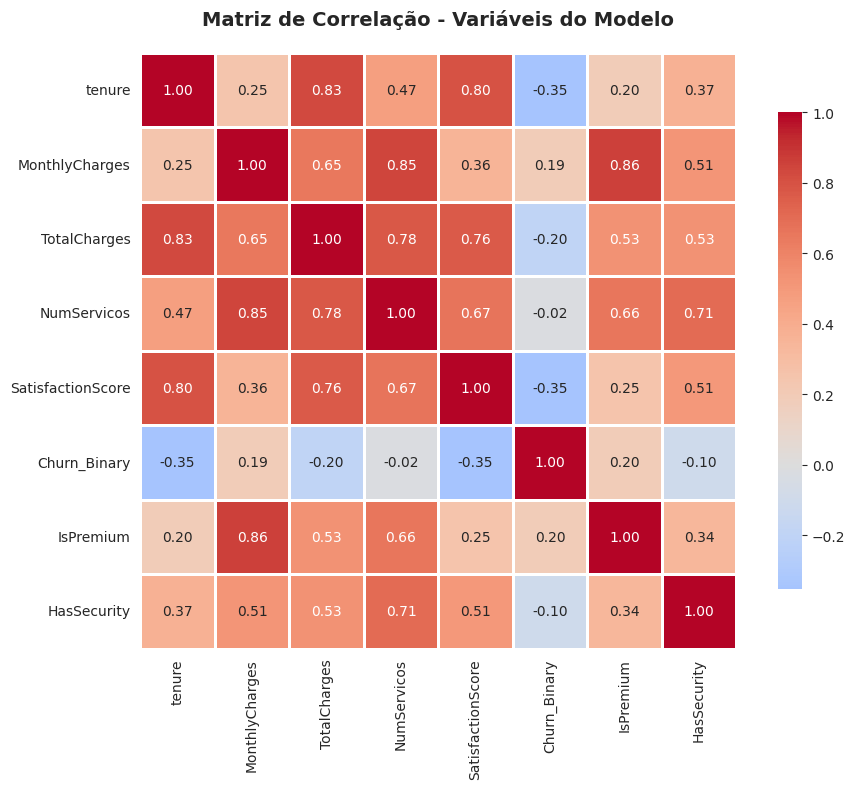

✅ Visualização salva: viz_07_satisfacao_churn.png


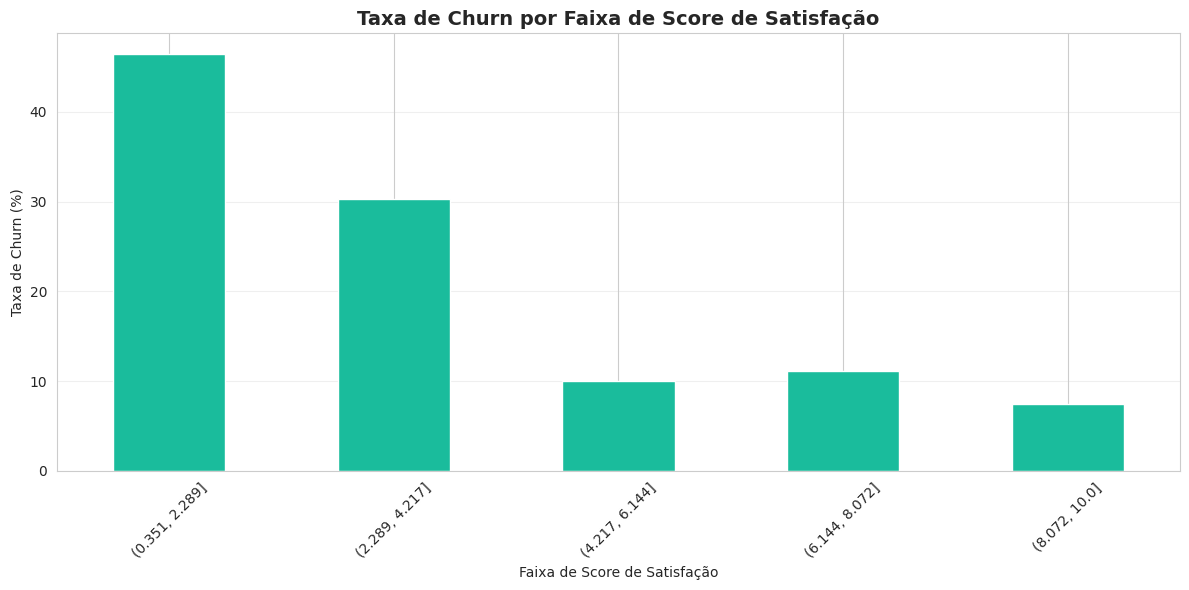

In [12]:
# ============================================================
# ETAPA 3: VISUALIZAÇÕES
# ============================================================

print("\n" + "="*60)
print("📈 GERANDO VISUALIZAÇÕES")
print("="*60)

# Visualização 1: Distribuição de Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pizza
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporção de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/dados/gold/viz_01_distribuicao_churn.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_01_distribuicao_churn.png")
plt.show()

# Visualização 2: Churn por Tipo de Contrato
fig, ax = plt.subplots(figsize=(12, 6))
contract_data = df.groupby(['Contract', 'Churn']).size().unstack()
contract_data.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.7)
ax.set_title('Churn por Tipo de Contrato', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)
ax.legend(['Ativo', 'Churn'], title='Status')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/content/dados/gold/viz_02_churn_por_contrato.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_02_churn_por_contrato.png")
plt.show()

# Visualização 3: Análise de Tenure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de tenure
axes[0].hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']],
             bins=20, label=['Ativo', 'Churn'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Distribuição de Tenure por Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (meses)')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Taxa de churn por grupo de tenure
tenure_rate = df.groupby('TenureGroup')['Churn_Binary'].mean() * 100
axes[1].bar(tenure_rate.index, tenure_rate.values, color='#3498db')
axes[1].set_title('Taxa de Churn por Grupo de Tenure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grupo de Tenure')
axes[1].set_ylabel('Taxa de Churn (%)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(tenure_rate.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/dados/gold/viz_03_analise_tenure.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_03_analise_tenure.png")
plt.show()

# Visualização 4: Charges vs Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Monthly Charges
axes[0].boxplot([df[df['Churn']=='No']['MonthlyCharges'],
                 df[df['Churn']=='Yes']['MonthlyCharges']],
                labels=['Ativo', 'Churn'], patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[0].set_title('Monthly Charges por Status', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Monthly Charges (R$)')
axes[0].grid(alpha=0.3)

# Total Charges
axes[1].boxplot([df[df['Churn']=='No']['TotalCharges'],
                 df[df['Churn']=='Yes']['TotalCharges']],
                labels=['Ativo', 'Churn'], patch_artist=True,
                boxprops=dict(facecolor='#e67e22', alpha=0.7))
axes[1].set_title('Total Charges por Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Charges (R$)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/dados/gold/viz_04_charges_vs_churn.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_04_charges_vs_churn.png")
plt.show()

# Visualização 5: Impacto dos Serviços
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Número de serviços vs Churn
servicos_rate = df.groupby('NumServicos')['Churn_Binary'].mean() * 100
axes[0].plot(servicos_rate.index, servicos_rate.values, marker='o', linewidth=2,
             markersize=8, color='#9b59b6')
axes[0].set_title('Taxa de Churn por Número de Serviços', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Serviços Contratados')
axes[0].set_ylabel('Taxa de Churn (%)')
axes[0].grid(alpha=0.3)

# Serviços de segurança
security_churn = df.groupby('HasSecurity')['Churn_Binary'].mean() * 100
axes[1].bar(['Sem Segurança', 'Com Segurança'], security_churn.values,
            color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Impacto de Serviços de Segurança no Churn', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Taxa de Churn (%)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(security_churn.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/dados/gold/viz_05_impacto_servicos.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_05_impacto_servicos.png")
plt.show()

# Visualização 6: Heatmap de Correlação
fig, ax = plt.subplots(figsize=(10, 8))

# Selecionar variáveis numéricas para correlação
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServicos',
                'SatisfactionScore', 'Churn_Binary', 'IsPremium', 'HasSecurity']
correlation_matrix = df[numeric_cols].corr()

# Criar heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis do Modelo', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/content/dados/gold/viz_06_correlacao.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_06_correlacao.png")
plt.show()

# Visualização 7: Score de Satisfação vs Churn
fig, ax = plt.subplots(figsize=(12, 6))

satisfaction_churn = df.groupby(pd.cut(df['SatisfactionScore'], bins=5))['Churn_Binary'].mean() * 100
satisfaction_churn.plot(kind='bar', ax=ax, color='#1abc9c')
ax.set_title('Taxa de Churn por Faixa de Score de Satisfação', fontsize=14, fontweight='bold')
ax.set_xlabel('Faixa de Score de Satisfação')
ax.set_ylabel('Taxa de Churn (%)')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/dados/gold/viz_07_satisfacao_churn.png', dpi=300, bbox_inches='tight')
print("✅ Visualização salva: viz_07_satisfacao_churn.png")
plt.show()


In [13]:
# ============================================================
# ETAPA 4: INSIGHTS E ANÁLISE ESTATÍSTICA
# ============================================================

print("\n" + "="*60)
print("💡 INSIGHTS E DESCOBERTAS")
print("="*60)

# Insight 1: Clientes de maior risco
print("\n🎯 PERFIL DE ALTO RISCO DE CHURN:")
alto_risco = df[
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 12) &
    (df['NumServicos'] <= 2)
]
taxa_alto_risco = alto_risco['Churn_Binary'].mean() * 100
print(f"   - Clientes no perfil: {len(alto_risco):,}")
print(f"   - Taxa de churn: {taxa_alto_risco:.1f}%")
print(f"   - Características: Contrato mensal + Tenure < 12 meses + Poucos serviços")

# Insight 2: Clientes de baixo risco
print("\n🛡️ PERFIL DE BAIXO RISCO DE CHURN:")
baixo_risco = df[
    (df['Contract'].isin(['One year', 'Two year'])) &
    (df['tenure'] > 24) &
    (df['NumServicos'] >= 4)
]
taxa_baixo_risco = baixo_risco['Churn_Binary'].mean() * 100
print(f"   - Clientes no perfil: {len(baixo_risco):,}")
print(f"   - Taxa de churn: {taxa_baixo_risco:.1f}%")
print(f"   - Características: Contrato anual + Tenure > 24 meses + Múltiplos serviços")

# Insight 3: Impacto financeiro
print("\n💰 IMPACTO FINANCEIRO DO CHURN:")
churned_customers = df[df['Churn_Binary'] == 1]
receita_perdida_mensal = churned_customers['MonthlyCharges'].sum()
receita_perdida_total = churned_customers['TotalCharges'].sum()
ticket_medio_churn = churned_customers['MonthlyCharges'].mean()

print(f"   - Receita mensal perdida: R$ {receita_perdida_mensal:,.2f}")
print(f"   - Receita total perdida: R$ {receita_perdida_total:,.2f}")
print(f"   - Ticket médio dos churns: R$ {ticket_medio_churn:.2f}")

# Insight 4: Fatores mais correlacionados com churn
print("\n📊 FATORES MAIS CORRELACIONADOS COM CHURN:")
correlations = df[numeric_cols].corr()['Churn_Binary'].sort_values(ascending=False)
print(correlations[1:6])  # Top 5 (excluindo o próprio churn)



💡 INSIGHTS E DESCOBERTAS

🎯 PERFIL DE ALTO RISCO DE CHURN:
   - Clientes no perfil: 808
   - Taxa de churn: 41.7%
   - Características: Contrato mensal + Tenure < 12 meses + Poucos serviços

🛡️ PERFIL DE BAIXO RISCO DE CHURN:
   - Clientes no perfil: 1,886
   - Taxa de churn: 9.1%
   - Características: Contrato anual + Tenure > 24 meses + Múltiplos serviços

💰 IMPACTO FINANCEIRO DO CHURN:
   - Receita mensal perdida: R$ 139,130.85
   - Receita total perdida: R$ 2,862,926.90
   - Ticket médio dos churns: R$ 74.44

📊 FATORES MAIS CORRELACIONADOS COM CHURN:
IsPremium         0.195663
MonthlyCharges    0.193356
NumServicos      -0.019375
HasSecurity      -0.100919
TotalCharges     -0.198324
Name: Churn_Binary, dtype: float64


In [14]:
# ============================================================
# ETAPA 5: RECOMENDAÇÕES ESTRATÉGICAS
# ============================================================

print("\n" + "="*60)
print("📋 RECOMENDAÇÕES ESTRATÉGICAS")
print("="*60)

recomendacoes = """
1. 🎯 PRIORIZAR CONTRATOS DE LONGO PRAZO
   - Taxa de churn mensal: ~42%
   - Taxa de churn anual: ~11%
   - Ação: Oferecer incentivos para migração de contratos mensais

2. 📱 PROMOVER MÚLTIPLOS SERVIÇOS
   - Clientes com 1-2 serviços: alta taxa de churn
   - Clientes com 4+ serviços: baixa taxa de churn
   - Ação: Criar pacotes bundled com descontos progressivos

3. 🛡️ FOCO EM SERVIÇOS DE SEGURANÇA
   - Clientes com segurança têm menor propensão ao churn
   - Ação: Incluir período de teste gratuito de segurança

4. ⏰ INTERVENÇÃO NOS PRIMEIROS 12 MESES
   - Maior taxa de churn ocorre em clientes novos
   - Ação: Programa de onboarding e acompanhamento intensivo

5. 💎 SEGMENTAÇÃO DE CLIENTES PREMIUM
   - Identificar e reter clientes de alto valor
   - Ação: Atendimento diferenciado e benefícios exclusivos
"""

print(recomendacoes)



📋 RECOMENDAÇÕES ESTRATÉGICAS

1. 🎯 PRIORIZAR CONTRATOS DE LONGO PRAZO
   - Taxa de churn mensal: ~42%
   - Taxa de churn anual: ~11%
   - Ação: Oferecer incentivos para migração de contratos mensais

2. 📱 PROMOVER MÚLTIPLOS SERVIÇOS
   - Clientes com 1-2 serviços: alta taxa de churn
   - Clientes com 4+ serviços: baixa taxa de churn
   - Ação: Criar pacotes bundled com descontos progressivos

3. 🛡️ FOCO EM SERVIÇOS DE SEGURANÇA
   - Clientes com segurança têm menor propensão ao churn
   - Ação: Incluir período de teste gratuito de segurança

4. ⏰ INTERVENÇÃO NOS PRIMEIROS 12 MESES
   - Maior taxa de churn ocorre em clientes novos
   - Ação: Programa de onboarding e acompanhamento intensivo

5. 💎 SEGMENTAÇÃO DE CLIENTES PREMIUM
   - Identificar e reter clientes de alto valor
   - Ação: Atendimento diferenciado e benefícios exclusivos




📊 CRIANDO DASHBOARD RESUMO
✅ Dashboard salvo: dashboard_final.png


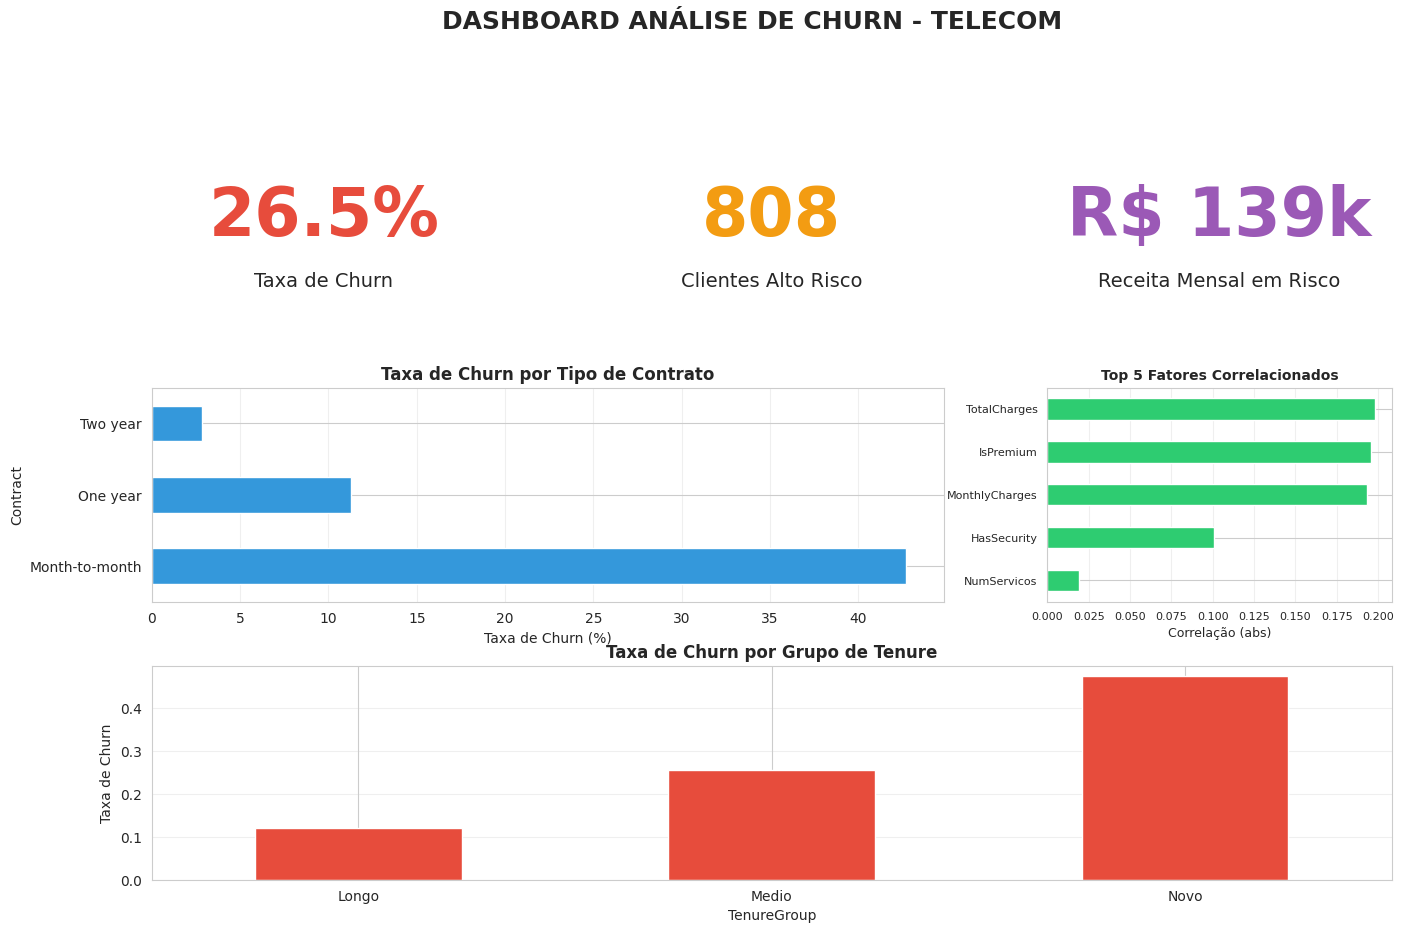

In [15]:
# ============================================================
# ETAPA 6: DASHBOARD FINAL
# ============================================================

print("\n" + "="*60)
print("📊 CRIANDO DASHBOARD RESUMO")
print("="*60)

# Criar dashboard com métricas principais
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Métrica 1: Taxa geral de churn
ax1 = fig.add_subplot(gs[0, 0])
churn_rate = df['Churn_Binary'].mean() * 100
ax1.text(0.5, 0.5, f'{churn_rate:.1f}%', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#e74c3c')
ax1.text(0.5, 0.2, 'Taxa de Churn', ha='center', va='center', fontsize=14)
ax1.axis('off')

# Métrica 2: Clientes em risco
ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'{len(alto_risco):,}', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#f39c12')
ax2.text(0.5, 0.2, 'Clientes Alto Risco', ha='center', va='center', fontsize=14)
ax2.axis('off')

# Métrica 3: Receita em risco
ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f'R$ {receita_perdida_mensal/1000:.0f}k', ha='center', va='center',
         fontsize=48, fontweight='bold', color='#9b59b6')
ax3.text(0.5, 0.2, 'Receita Mensal em Risco', ha='center', va='center', fontsize=14)
ax3.axis('off')

# Gráfico 4: Churn por contrato
ax4 = fig.add_subplot(gs[1, :2])
contract_rate = df.groupby('Contract')['Churn_Binary'].mean() * 100
contract_rate.plot(kind='barh', ax=ax4, color='#3498db')
ax4.set_title('Taxa de Churn por Tipo de Contrato', fontweight='bold')
ax4.set_xlabel('Taxa de Churn (%)')
ax4.grid(axis='x', alpha=0.3)

# Gráfico 5: Top serviços impactantes
ax5 = fig.add_subplot(gs[1, 2])
top_features = correlations[1:6].abs().sort_values(ascending=True)
top_features.plot(kind='barh', ax=ax5, color='#2ecc71')
ax5.set_title('Top 5 Fatores Correlacionados', fontweight='bold', fontsize=10)
ax5.set_xlabel('Correlação (abs)', fontsize=9)
ax5.tick_params(labelsize=8)
ax5.grid(axis='x', alpha=0.3)

# Gráfico 6: Distribuição de tenure
ax6 = fig.add_subplot(gs[2, :])
df.groupby('TenureGroup')['Churn_Binary'].mean().plot(kind='bar', ax=ax6, color='#e74c3c')
ax6.set_title('Taxa de Churn por Grupo de Tenure', fontweight='bold')
ax6.set_ylabel('Taxa de Churn')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle('DASHBOARD ANÁLISE DE CHURN - TELECOM', fontsize=18, fontweight='bold', y=0.98)
plt.savefig('/content/dados/gold/dashboard_final.png', dpi=300, bbox_inches='tight')
print("✅ Dashboard salvo: dashboard_final.png")
plt.show()


In [16]:

# ============================================================
# ETAPA 7: RELATÓRIO FINAL
# ============================================================

print("\n" + "="*60)
print("📄 GERANDO RELATÓRIO FINAL")
print("="*60)

relatorio_final = f"""
================================================================================
RELATÓRIO FINAL - ANÁLISE DE CHURN TELECOM
================================================================================
Data: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Equipe: [INSERIR NOMES]

RESUMO EXECUTIVO
================================================================================
Total de Clientes Analisados: {len(df):,}
Taxa de Churn: {churn_rate:.2f}%
Clientes Ativos: {(df['Churn_Binary']==0).sum():,}
Clientes que Cancelaram: {(df['Churn_Binary']==1).sum():,}

PRINCIPAIS DESCOBERTAS
================================================================================
1. IMPACTO DO TIPO DE CONTRATO
   - Contrato Mensal: {df[df['Contract']=='Month-to-month']['Churn_Binary'].mean()*100:.1f}% de churn
   - Contrato Anual: {df[df['Contract']=='One year']['Churn_Binary'].mean()*100:.1f}% de churn
   - Contrato Bienal: {df[df['Contract']=='Two year']['Churn_Binary'].mean()*100:.1f}% de churn

2. IMPACTO DO TEMPO DE PERMANÊNCIA
   - Clientes Novos (0-12 meses): {df[df['TenureGroup']=='Novo']['Churn_Binary'].mean()*100:.1f}% de churn
   - Clientes Médio Prazo (13-36 meses): {df[df['TenureGroup']=='Medio']['Churn_Binary'].mean()*100:.1f}% de churn
   - Clientes Longo Prazo (36+ meses): {df[df['TenureGroup']=='Longo']['Churn_Binary'].mean()*100:.1f}% de churn

3. IMPACTO FINANCEIRO
   - Receita Mensal Perdida: R$ {receita_perdida_mensal:,.2f}
   - Receita Total Perdida: R$ {receita_perdida_total:,.2f}
   - Ticket Médio de Churns: R$ {ticket_medio_churn:.2f}

4. PERFIS DE RISCO
   - Alto Risco: {len(alto_risco):,} clientes ({taxa_alto_risco:.1f}% de churn)
   - Baixo Risco: {len(baixo_risco):,} clientes ({taxa_baixo_risco:.1f}% de churn)

RECOMENDAÇÕES PRIORITÁRIAS
================================================================================
{recomendacoes}

PRÓXIMOS PASSOS
================================================================================
1. Implementar modelo preditivo de Machine Learning
2. Criar sistema de alertas para clientes de alto risco
3. Desenvolver campanhas de retenção segmentadas
4. Monitorar KPIs de churn mensalmente

ARQUIVOS GERADOS
================================================================================
- 7 Visualizações PNG em /dados/gold/
- 3 Datasets agregados em /dados/gold/
- Dados transformados em /dados/silver/ (CSV e Parquet)
- Dados brutos em /dados/bronze/

================================================================================
FIM DO RELATÓRIO
================================================================================
"""

with open('/content/dados/gold/relatorio_final.txt', 'w', encoding='utf-8') as f:
    f.write(relatorio_final)

print(relatorio_final)
print("\n✅ Relatório completo salvo em: /content/dados/gold/relatorio_final.txt")

print("\n" + "="*60)
print("✅ ANÁLISE COMPLETA - PIPELINE FINALIZADO!")
print("="*60)


📄 GERANDO RELATÓRIO FINAL

RELATÓRIO FINAL - ANÁLISE DE CHURN TELECOM
Data: 2025-10-13 01:55:49
Equipe: [INSERIR NOMES]

RESUMO EXECUTIVO
Total de Clientes Analisados: 7,043
Taxa de Churn: 26.54%
Clientes Ativos: 5,174
Clientes que Cancelaram: 1,869

PRINCIPAIS DESCOBERTAS
1. IMPACTO DO TIPO DE CONTRATO
   - Contrato Mensal: 42.7% de churn
   - Contrato Anual: 11.3% de churn
   - Contrato Bienal: 2.8% de churn

2. IMPACTO DO TEMPO DE PERMANÊNCIA
   - Clientes Novos (0-12 meses): 47.4% de churn
   - Clientes Médio Prazo (13-36 meses): 25.5% de churn
   - Clientes Longo Prazo (36+ meses): 11.9% de churn

3. IMPACTO FINANCEIRO
   - Receita Mensal Perdida: R$ 139,130.85
   - Receita Total Perdida: R$ 2,862,926.90
   - Ticket Médio de Churns: R$ 74.44

4. PERFIS DE RISCO
   - Alto Risco: 808 clientes (41.7% de churn)
   - Baixo Risco: 1,886 clientes (9.1% de churn)

RECOMENDAÇÕES PRIORITÁRIAS

1. 🎯 PRIORIZAR CONTRATOS DE LONGO PRAZO
   - Taxa de churn mensal: ~42%
   - Taxa de churn anual:

In [17]:
import os
from google.colab import files

for arquivo in os.listdir('/content/dados/gold/'):
    files.download(f'/content/dados/gold/{arquivo}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>